# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List Using citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | coahuayana de hidalgo
Processing Record 3 of Set 1 | usinsk
Processing Record 4 of Set 1 | ryotsu-minato
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | nar'yan-mar
Processing Record 7 of Set 1 | malangawa
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | kirakira
Processing Record 12 of Set 1 | buka
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | jiagedaqi
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | ridgecrest
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | papao
Processing Record 21 of Set 1 | waitangi
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,8.38,65,40,2.09,RO,1711758020
1,coahuayana de hidalgo,18.7000,-103.6583,27.99,47,81,2.22,MX,1711758026
2,usinsk,65.9939,57.5281,-8.85,94,66,5.36,RU,1711758027
3,ryotsu-minato,38.0833,138.4333,10.54,71,45,8.99,JP,1711758027
4,carnarvon,-24.8667,113.6333,25.19,49,36,6.78,AU,1711758027


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,8.38,65,40,2.09,RO,1711758020
1,coahuayana de hidalgo,18.7000,-103.6583,27.99,47,81,2.22,MX,1711758026
2,usinsk,65.9939,57.5281,-8.85,94,66,5.36,RU,1711758027
3,ryotsu-minato,38.0833,138.4333,10.54,71,45,8.99,JP,1711758027
4,carnarvon,-24.8667,113.6333,25.19,49,36,6.78,AU,1711758027


## Scatter Plots
### Latitude vs. Temperature

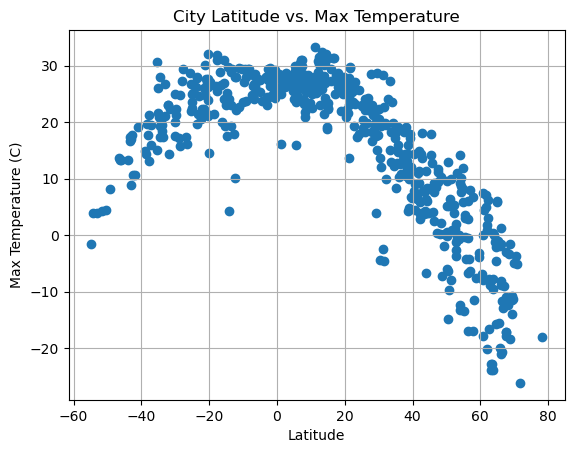

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude vs. Humidity

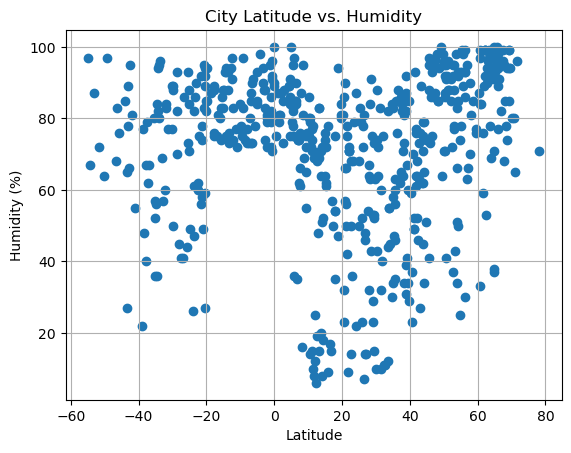

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

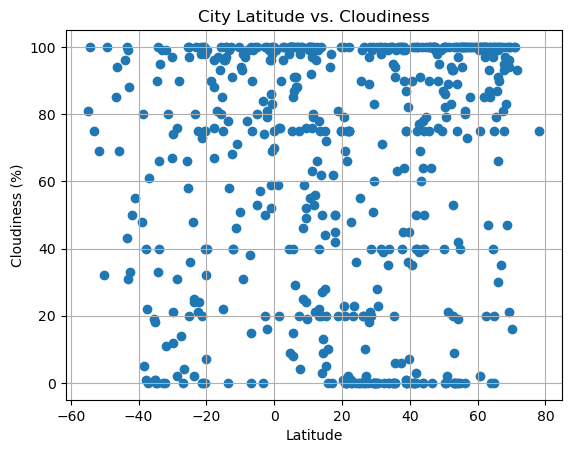

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude Vs. Wind Speed

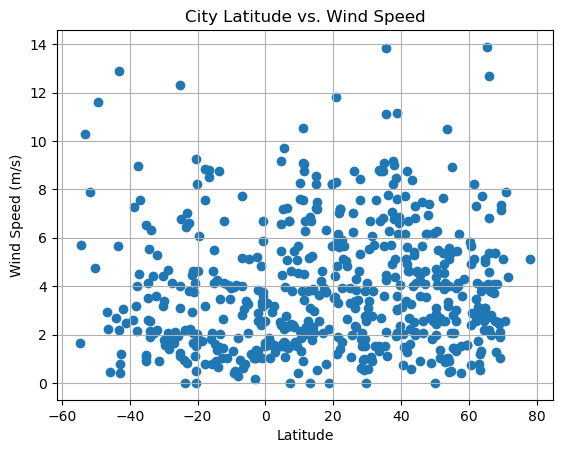

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Linear Regressions

In [12]:
# Define a function to create Linear Regression plots
def create_plot(x, y, y_label):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (0,0), xycoords='axes points',fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,8.38,65,40,2.09,RO,1711758020
1,coahuayana de hidalgo,18.7000,-103.6583,27.99,47,81,2.22,MX,1711758026
2,usinsk,65.9939,57.5281,-8.85,94,66,5.36,RU,1711758027
3,ryotsu-minato,38.0833,138.4333,10.54,71,45,8.99,JP,1711758027
5,nar'yan-mar,67.6713,53.0870,-17.16,95,93,5.36,RU,1711758028


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,carnarvon,-24.8667,113.6333,25.19,49,36,6.78,AU,1711758027
7,port mathurin,-19.6833,63.4167,26.58,85,99,6.07,MU,1711758028
8,ushuaia,-54.8000,-68.3000,-1.58,97,81,1.65,AR,1711757824
10,kirakira,-10.4544,161.9205,29.47,77,100,3.47,SB,1711758029
12,adamstown,-25.0660,-130.1015,23.52,71,100,12.31,PN,1711758030


## Temperature vs. Latitude Linear Regression Plot

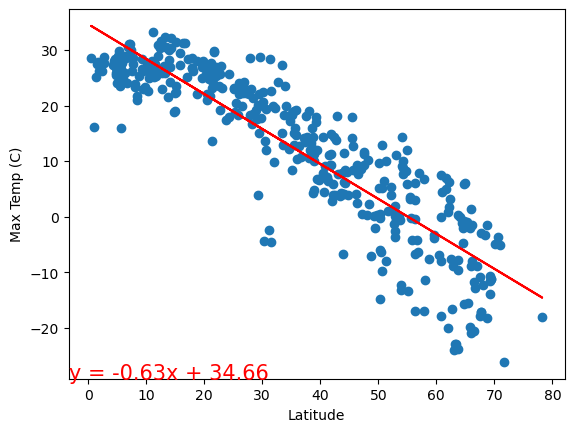

In [15]:
# Linear regression on Northern Hemisphere
create_plot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Max Temp'], y_label='Max Temp (C)')

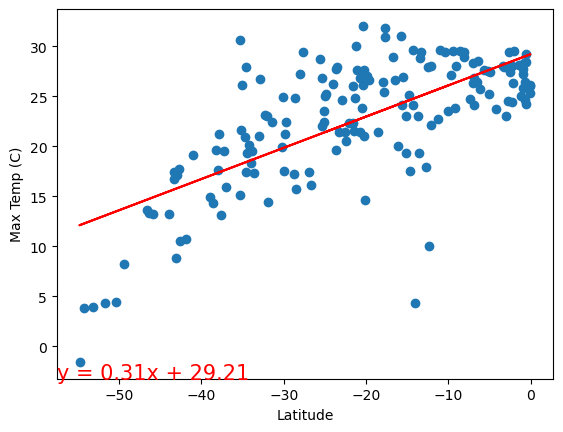

In [16]:
# Linear regression on Southern Hemisphere
create_plot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Max Temp'], y_label='Max Temp (C)')

## Humidity vs. Latitude Linear Regression Plot

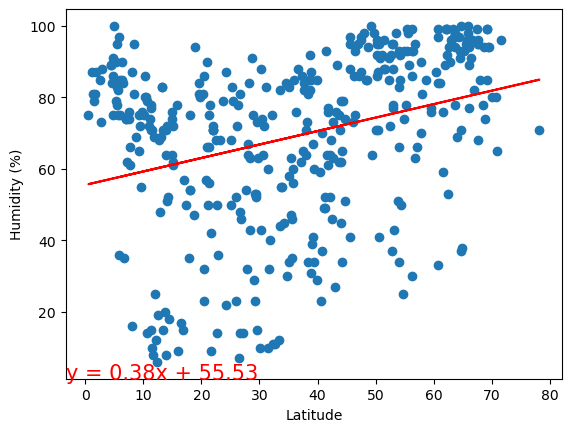

In [17]:
# Northern Hemisphere
create_plot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Humidity'], y_label='Humidity (%)')

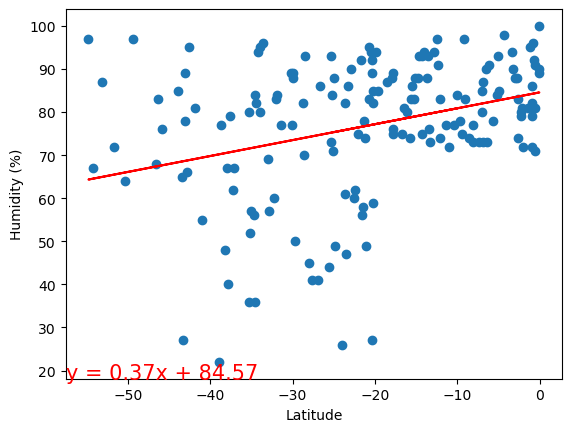

In [18]:
# Southern Hemisphere
create_plot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Humidity'], y_label='Humidity (%)')

## Cloudiness vs. Latitude Linear Regression Plot

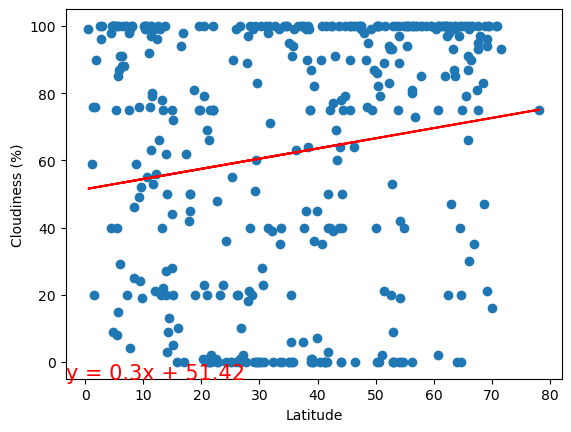

In [19]:
# Northern Hemisphere
create_plot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Cloudiness'], y_label='Cloudiness (%)')

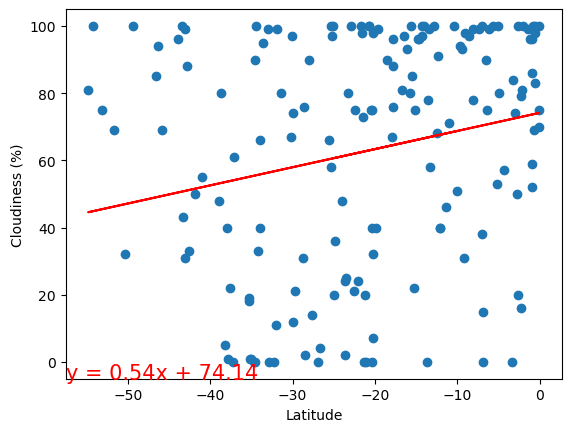

In [20]:
# Southern Hemisphere
create_plot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Cloudiness'], y_label='Cloudiness (%)')

## Wind Speed vs. Latitude Linear Regression Plot

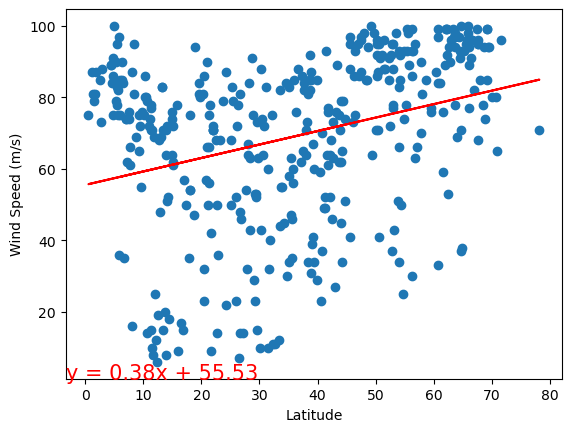

In [21]:
# Northern Hemisphere
create_plot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Humidity'], y_label='Wind Speed (m/s)')

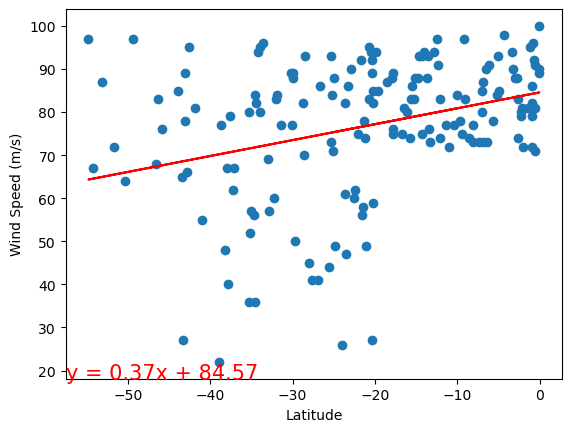

In [22]:
# Southern Hemisphere
create_plot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Humidity'], y_label='Wind Speed (m/s)')